<a href="https://colab.research.google.com/github/Dalazen/IA/blob/main/Introduc%CC%A7a%CC%83o_a_Recomendac%CC%A7a%CC%83o_TeachersVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Compreendendo o dataset movies.csv (filmes)
### colunas = ["filmeId", "titulo", "generos"]
#### .set_index("filmeId)

In [2]:
import pandas as pd

filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.set_index("filmeId", inplace=True)

filmes

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


## Dataset complementar ratings.csv (notas)
### colunas = ["usuarioId", "filmeId", "nota", "momento"]

In [4]:
notas = pd.read_csv('ratings.csv')
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

### Describe

In [5]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,43084.000000,43084.000000,43084.000000,4.308300e+04
mean,145.216206,18582.328103,3.566951,1.181536e+09
std,85.595025,35281.316493,1.022535,2.146729e+08
min,1.000000,1.000000,0.500000,8.293223e+08
25%,68.000000,1090.000000,3.000000,9.785596e+08
50%,140.000000,2791.000000,4.000000,1.161566e+09
75%,221.000000,7155.000000,4.000000,1.393542e+09
max,288.000000,193587.000000,5.000000,1.537650e+09


# Primeira abordagem de recomendação: heurística de total de votos (value_counts)

In [6]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos

356       153
296       151
318       147
2571      134
593       131
         ... 
85316       1
86066       1
171023      1
88345       1
31923       1
Name: filmeId, Length: 6433, dtype: int64

### Adicionando o total de votos como coluna do dataset filmes

In [7]:
filmes['total_de_votos'] = total_de_votos
filmes

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0
2,Jumanji (1995),Adventure|Children|Fantasy,45.0
3,Grumpier Old Men (1995),Comedy|Romance,26.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,5.0
5,Father of the Bride Part II (1995),Comedy,25.0
...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0
193585,Flint (2017),Drama,1.0


### Ordenando o dataset de filmes por total de votos decrescente

In [8]:
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,153.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,151.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,147.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,134.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,131.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,119.0
110,Braveheart (1995),Action|Drama|War,110.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,109.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0


### Agrupando o dataset notas por filmeId e agregando por média obtendo a coluna "nota"

In [9]:
notas_medias = notas.groupby("filmeId").mean()["nota"]
notas_medias

filmeId
1         3.897196
2         3.366667
3         3.538462
4         2.600000
5         3.480000
            ...   
193579    3.500000
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
Name: nota, Length: 6433, dtype: float64

### Adicionando as notas_medias como coluna do dataset filmes

In [10]:
filmes['nota_media'] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)
filmes

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0,3.897196
2,Jumanji (1995),Adventure|Children|Fantasy,45.0,3.366667
3,Grumpier Old Men (1995),Comedy|Romance,26.0,3.538462
4,Waiting to Exhale (1995),Comedy|Drama|Romance,5.0,2.600000
5,Father of the Bride Part II (1995),Comedy,25.0,3.480000
...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0,4.000000
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0,3.500000
193585,Flint (2017),Drama,1.0,3.500000


# Uma segunda heurística: nota média com filtro de votos

In [11]:
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
86721,Idiots and Angels (2008),Animation|Drama|Fantasy,1.0,5.0
2204,Saboteur (1942),Mystery|Thriller,1.0,5.0
93022,Miss Nobody (2010),Comedy|Crime,1.0,5.0
93008,"Very Potter Sequel, A (2010)",Comedy|Musical,1.0,5.0
120478,The Salt of the Earth (2014),Documentary,1.0,5.0
7008,Last Tango in Paris (Ultimo tango a Parigi) (1...,Drama|Romance,2.0,5.0
92643,Monsieur Lazhar (2011),Children|Comedy|Drama,1.0,5.0
92494,Dylan Moran: Monster (2004),Comedy|Documentary,1.0,5.0
31364,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller,1.0,5.0


### Pelo menos 10 votos

In [13]:
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1212,"Third Man, The (1949)",Film-Noir|Mystery|Thriller,12.0,4.666667
898,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,13.0,4.576923
922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,14.0,4.464286
926,All About Eve (1950),Drama,10.0,4.450000
1250,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War,19.0,4.421053
318,"Shawshank Redemption, The (1994)",Crime|Drama,147.0,4.411565
3275,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller,22.0,4.409091
1209,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western,11.0,4.363636
475,In the Name of the Father (1993),Drama,14.0,4.357143


### Filmes com mais de 50 votos

In [14]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos > 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,147.0,4.411565
58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,67.0,4.350746
1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,70.0,4.307143
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,119.0,4.256303
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,105.0,4.252381
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,94.0,4.250000
1193,One Flew Over the Cuckoo's Nest (1975),Drama,66.0,4.227273
1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,99.0,4.227273
527,Schindler's List (1993),Drama|War,96.0,4.208333


### Filtro de filmes que "eu" assisti

In [15]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0,3.897196
21,Get Shorty (1995),Comedy|Crime|Thriller,43.0,3.604651
19,Ace Ventura: When Nature Calls (1995),Comedy,39.0,2.756410
10,GoldenEye (1995),Action|Adventure|Thriller,59.0,3.516949
11,"American President, The (1995)",Comedy|Drama|Romance,32.0,3.906250
7,Sabrina (1995),Comedy|Romance,31.0,3.274194
2,Jumanji (1995),Adventure|Children|Fantasy,45.0,3.366667


### Filtro de filmes por gênero ordenado pela nota média

In [17]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,52.0,3.846154


In [ ]:
# Abordagens Collaborative filtering x Content based filtering

# Procurar usuários "similares" (Collaborative Filtering)

- joão deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

x-y ==> distância

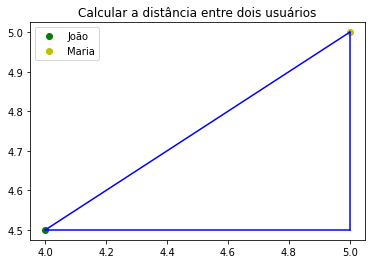

In [18]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-")

### Diferença linear entre 2 usuários

In [19]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

### O Teorema de Pitágoras pode ser implementado com a raiz quadrada da soma entre os produtos dos catetos

In [20]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [21]:
def pitagoras(a,b):
    return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

### Exemplos

Text(0.5, 1.0, 'Calcular a distância entre usuários')

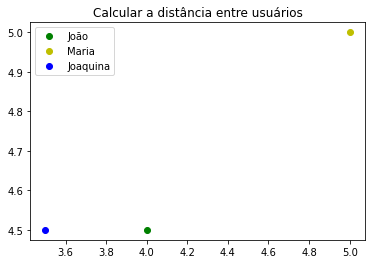

In [22]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre usuários")


In [23]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


# Distância entre usuários do dataset

In [24]:
def distancia_de_vetores(a,b):
    return np.linalg.norm(a - b)

### Busca as notas de um dado usuário e retorna associado ao filmeId

In [25]:
def notas_do_usuario(usuario):
    notas_do_usuario = notas.query("usuarioId==%d" % usuario)
    notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
    
    return notas_do_usuario

### Teste

In [26]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [27]:
usuario1

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [28]:
usuario4

,nota
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0
...,...
4765,5.0
4881,3.0
4896,4.0


### Calcular as diferenças das notas de 2 usuários

In [ ]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

### Distância entre 2 usuários em uma função

In [29]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
    distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

### Teste

In [30]:
distancia_de_usuarios(1,4)

[1, 4, 11.135528725660043]

### Quantos usuários únicos temos no dataset

In [31]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print("Temos %d usuarios" % quantidade_de_usuarios)

Temos 288 usuarios


### Percorrendo todos os usuários e armazenando a distância

In [32]:
def distancia_de_todos(voce_id):
    distancias = []
    for usuario_id in notas['usuarioId'].unique():
        distancia_entre_dois_usuarios = distancia_de_usuarios(voce_id, usuario_id)
        distancias.append(distancia_entre_dois_usuarios)
    return distancias

distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

### Utilizando uma lista para criar um dataframe de distancias

In [33]:
def distancia_de_todos(voce_id):
    todos_os_usuarios = notas['usuarioId'].unique()
    distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
    return distancias

distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


### Diferença das notas de um usuário para outro

In [36]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="5").dropna()

,nota_1,nota5
filmeId,,
1,4.0,4.0
50,5.0,4.0
110,4.0,4.0
296,3.0,5.0
316,3.0,2.0
349,4.0,3.0
367,4.0,4.0
457,5.0,4.0
527,5.0,5.0


In [35]:
notas_do_usuario(1).join(notas_do_usuario(2), lsuffix="_1", rsuffix="2").dropna()

,nota_1,nota2
filmeId,,
333,5.0,4.0
3578,5.0,4.0


In [34]:
notas_do_usuario(1).join(notas_do_usuario(3), lsuffix="_1", rsuffix="3").dropna()

,nota_1,nota3
filmeId,,
527,5.0,0.5
1275,5.0,3.5
1587,5.0,4.5
2018,5.0,0.5
2090,5.0,0.5
2105,4.0,2.0
3703,5.0,5.0


# Usuários sem filmes em comum serão colocados bem distantes um do outro para ressaltar a diferença

In [37]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
    if(len(diferencas) < minimo):
        return [usuario_id1, usuario_id2, 100000]
  
    distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

In [38]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


### Encontrar os usuários mais próximos de um usuário-alvo

In [39]:
def mais_proximos_de(usuario_alvo_id):

    distancias = distancia_de_todos(usuario_alvo_id)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(usuario_alvo_id)
    return distancias

In [40]:
mais_proximos_de(1).head()

,voce,distancia
outra_pessoa,,
77,1,0.000000
49,1,1.000000
258,1,1.000000
9,1,1.000000
65,1,1.322876


# Funções reescritas com parâmetro de número de vizinhos

In [41]:
def mais_proximos_de(usuario_alvo_id, n = None):
    distancias = distancia_de_todos(usuario_alvo_id, n = n)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(usuario_alvo_id)
    return distancias

In [42]:
def distancia_de_todos(usuario_alvo_id, n = None):
    todos_os_usuarios = notas['usuarioId'].unique()
    if n:
        todos_os_usuarios = todos_os_usuarios[:n]
    distancias = [distancia_de_usuarios(usuario_alvo_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ["usuario_alvo", "outra_pessoa", "distancia"])
    return distancias

In [43]:
mais_proximos_de(1, n = 50)

,usuario_alvo,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
13,1,1.414214
25,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


### Aqui estabelecemos que o número mínimo de notas de filmes iguais para considerar dois usuários parecidos é igual a cinco (5)

In [44]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
    if(len(diferencas) < minimo):
        return None
  
    distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

### A função distância de 1 usuário contra todos recebe o nro de usuários a analisar (n) e filtra somente os usuários similares de acordo com o critério de notas mínimas

In [45]:
def distancia_de_todos(usuario_alvo_id, numero_de_usuarios_a_analisar = None):
    todos_os_usuarios = notas['usuarioId'].unique()
    if numero_de_usuarios_a_analisar:
        todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
    distancias = [distancia_de_usuarios(usuario_alvo_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns = ["usuario_alvo", "outra_pessoa", "distancia"])
    return distancias

### Busca os usuários mais próximos ao usuário-alvo

In [46]:
def mais_proximos_de(usuario_alvo_id, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(usuario_alvo_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(usuario_alvo_id)
    return distancias

In [47]:
mais_proximos_de(1, numero_de_usuarios_a_analisar = 50)

,usuario_alvo,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


### Como funciona a recomendação: 
#### 1. Busca as avaliações do usuário-alvo
#### 2. Busca os usuários mais próximos (vizinhos) ao usuário-alvo
#### 3. Busca as notas do usuário mais próximo
#### 4. Remove os filmes que o usuário-alvo já viu
#### 5. Seleciona os filmes do usuário mais similar

In [48]:
def sugere_para(usuario_alvo, numero_de_usuarios_a_analisar = None):

    # Parte 1
    notas_de_voce = notas_do_usuario(usuario_alvo)
    filmes_que_voce_ja_viu = notas_de_voce.index

    # Parte 2
    similares = mais_proximos_de(usuario_alvo, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    similar = similares.iloc[0].name

    # Parte 3
    notas_do_similar = notas_do_usuario(similar)
    
    # Parte 4
    notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')

    # Parte 5
    recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

In [49]:
sugere_para(1, numero_de_usuarios_a_analisar=50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,60.0,3.866667
4022,4.5,Cast Away (2000),Drama,44.0,3.602273
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,25.0,3.800000
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,61.0,4.008197
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,33.0,3.954545


In [50]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,39.0,3.897436
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,67.0,4.350746
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,51.0,3.901961
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,87.0,4.011494
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,58.0,3.500000


# Sugerindo baseado em vários usuários

## Podemos considerar 2 parâmetros: o número de vizinhos e o número de usuários a analisar no dataset. Se tiver milhões de usuários, o custo de comparação será elevado

In [51]:
def mais_proximos_de(usuario_alvo_id, n_mais_proximos=10, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(usuario_alvo_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(usuario_alvo_id)
    return distancias.head(n_mais_proximos)

In [52]:
mais_proximos_de(1, n_mais_proximos = 2, numero_de_usuarios_a_analisar=300)

,usuario_alvo,distancia
outra_pessoa,,
77,1,0.0
49,1,1.0


### Nessa versão vamos combinar os filmes de "n" usuários mais próximos

In [53]:
def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
    recomendacoes = recomendacoes.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

In [54]:
sugere_para(1, numero_de_usuarios_a_analisar = 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,6.0,4.333333
68157,5.0,Inglourious Basterds (2009),Action|Drama|War,38.0,4.223684
475,5.0,In the Name of the Father (1993),Drama,14.0,4.357143
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,51.0,3.901961
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,80.0,4.081250


In [55]:
sugere_para(1, numero_de_usuarios_a_analisar = 300).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,6.0,4.333333
3752,5.0,"Me, Myself & Irene (2000)",Adventure|Comedy,19.0,3.184211
818,5.0,"Very Brady Sequel, A (1996)",Comedy,5.0,3.400000
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,39.0,3.897436
802,5.0,Phenomenon (1996),Drama|Romance,19.0,3.631579


In [56]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,6.0,4.333333
3752,5.0,"Me, Myself & Irene (2000)",Adventure|Comedy,19.0,3.184211
818,5.0,"Very Brady Sequel, A (1996)",Comedy,5.0,3.400000
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,39.0,3.897436
802,5.0,Phenomenon (1996),Drama|Romance,19.0,3.631579


### O algoritmo kNN é um lazy learner (memory-based), porém, é eficaz para recomendações colaborativas

In [57]:
def knn(usuario_alvo_id, k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(usuario_alvo_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(usuario_alvo_id)
    return distancias.head(k_mais_proximos)

### A solução de recomendação agora usa o kNN e a média dos filmes dos usuários mais parecidos

In [58]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
    recomendacoes = recomendacoes.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

# Testar um usuário novo (exercício)

### Determine o ID do novo usuário
### Teste o novo usuário chamando a função correta

In [59]:
filmes.loc[[122904, 1246, 2529, 2329 , 2324 , 1 , 7 , 2 ,1196, 260]]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,27.0,3.814815
1246,Dead Poets Society (1989),Drama,34.0,4.000000
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,21.0,3.857143
2329,American History X (1998),Crime|Drama,57.0,4.131579
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,36.0,3.930556
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0,3.897196
7,Sabrina (1995),Comedy|Romance,31.0,3.274194
2,Jumanji (1995),Adventure|Children|Fantasy,45.0,3.366667
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,105.0,4.252381


In [61]:
def novo_usuario(dados):
    novo_usuario = max(notas.usuarioId) + 1
    notas_do_usuario_novo = pd.DataFrame(dados, columns=["filmeId", "nota"])
    notas_do_usuario_novo['usuarioId'] = novo_usuario
    return pd.concat([notas, notas_do_usuario_novo])

In [90]:
notas = novo_usuario([[122904,2],[1246,5],[2529,2],[2329,5],[2324,5],[1,2],[7,0.5],[2,2],[1196,1],[260,1]])
notas.tail()

,level_0,index,usuarioId,filmeId,nota,momento
5,NaN,NaN,295,1,2.0,NaN
6,NaN,NaN,295,7,0.5,NaN
7,NaN,NaN,295,2,2.0,NaN
8,NaN,NaN,295,1196,1.0,NaN
9,NaN,NaN,295,260,1.0,NaN


In [92]:
sugere_para(295).head()

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,


# Exercício: utilizar somente as notas de filmes com mais de 50 votos
### Refaça a recomendação. Está diferente?

In [93]:
notas = notas.query(f'filmeId in {list(filmes_com_mais_de_50_votos.reset_index().filmeId)}')
notas.head()

,level_0,index,usuarioId,filmeId,nota,momento
0,0.0,0.0,1,1,4.0,964982703.0
1,1.0,3.0,1,47,5.0,964983815.0
2,2.0,4.0,1,50,5.0,964982931.0
3,3.0,7.0,1,110,4.0,964982176.0
4,4.0,13.0,1,231,5.0,964981179.0


In [96]:
notas = notas.reset_index()
notas.head()

ValueError: ignored

In [95]:
sugere_para(295)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,


### Nessa última versão consideraremos uma quantidade mínima de aparições de um filme para fazer a sugestão. Como benefício, você evita sugerir para o usuário filmes "obscuros"

In [77]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
    aparicoes = notas_dos_similares.groupby("filmeId").count()[['nota']]
  
    filtro_minimo = k_mais_proximos / 2
    recomendacoes = recomendacoes.join(aparicoes, lsuffix="_media_dos_usuarios", rsuffix="_aparicoes_nos_usuarios")
    recomendacoes = recomendacoes.query("nota_aparicoes_nos_usuarios >= %.2f" % filtro_minimo)  
    recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending=False)
    recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu,errors='ignore')
    return recomendacoes.join(filmes)

In [78]:
def knn(voce_id, k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(voce_id, errors='ignore')
    return distancias.head(k_mais_proximos)

In [79]:
sugere_para(1, numero_de_usuarios_a_analisar=500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
318,4.5,5,"Shawshank Redemption, The (1994)",Crime|Drama,147.0,4.411565


In [97]:
sugere_para(295).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,


In [99]:
sugere_para(295, k_mais_proximos=20).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
